In [1]:
import numpy as np # array opratioin
import matplotlib.pyplot as plt # show img
import os  # fro joining path and iterate thorugh directory 
import cv2 as cv # to do image operation
import random
from tqdm import tqdm

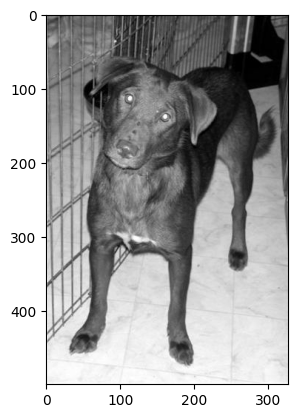

In [2]:
DATADIR = "PetImages" 

Categories  = ["Dog","Cat"]

for c in Categories:
    path = os.path.join(DATADIR,c) 
    for img in os.listdir(path):
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show
        break
    break

In [3]:
print(img_array) # img vector matrix
print(img_array.shape) 

[[255 211 199 ... 201 208 210]
 [222 157 125 ... 107 106 104]
 [237 157 110 ...  93  88  86]
 ...
 [254 251 248 ... 238 238 240]
 [254 253 251 ... 244 244 245]
 [253 253 253 ... 249 248 249]]
(500, 327)


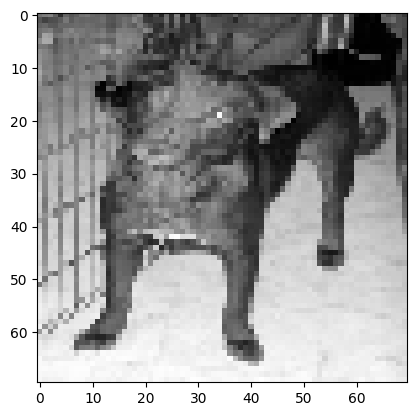

In [8]:
IMG_S = 70  
new_array = cv.resize(img_array,(IMG_S,IMG_S))
plt.imshow(new_array,cmap="gray")
plt.show() 

# COLLECTING TRAINING DATA

In [16]:
training_data = []
def creat_training_data():
    for c in Categories:
        path = os.path.join(DATADIR,c) 
        class_num = Categories.index(c) # get the classification  (0 or a 1). 0=dog 1=cat
        
        for img in tqdm(os.listdir(path)):   # iterate over each image per dogs and cats
            try:
                img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
                new_array = cv.resize(img_array,(IMG_S,IMG_S))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
creat_training_data()

100%|████████████████████████████████████████████████████████████████████████████| 12501/12501 [03:26<00:00, 60.41it/s]


In [17]:
print(len(training_data))
random.shuffle(training_data)

24946


we've got the classes nicely mixed in! Time to make our model!

In [18]:
X=[]
Y=[]

for features,label in training_data:
    X.append(features)
    Y.append(label)

# print(X[0].reshape(-1,IMG_S,IMG_S,1))

X = np.array(X).reshape(-1,IMG_S,IMG_S,1)


In [19]:
import pickle

pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close

pickle_out=open("Y.pickle","wb")
pickle.dump(Y,pickle_out)
pickle_out.close()

# pickle_in = open("X_pickle","rb")
# X=pickle.load(pickle_in)

# pickle_in = open("Y_pickle","rb")
# Y=pickle.load(pickle_in)

The Convolutional Neural Network gained popularity through its use with image data, and is currently the state of the art for detecting what an image is, or what is contained in the image.

The basic CNN structure is as follows: Convolution -> Pooling -> Convolution -> Pooling -> Fully Connected Layer -> Output

NOW MAKING MAIN MODEL 